<a href="https://colab.research.google.com/github/emiliomercuri/EnvHidrology2024/blob/main/aulas/2024_04_08-Aula12/Exemplo_Evapora%C3%A7%C3%A3o_M%C3%A9todos_Aerodin%C3%A2mico_e_Balan%C3%A7o_de_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo

Suponha que os dados da tabela abaixo (do dia 17/10/2020) são registros meteorológicos de medição realizada a 2 metros acima de uma superfície aquosa. Calcule a taxa de evaporação total (mm/dia) com os métodos:

* a) Método do balanço de energia
* b) Método aerodinâmico
* c) Método combinado

O calor latente de vaporização $l_{v}$, em kJ/kg, pode ser calculado usando $l_{v}=2500-2.36 \times T$, sendo que a temperatura do ar $T$ deve ser fornecida em $^\circ$C. Usar $\rho_w = 997$ kg/m$^3$ e $\rho_a = 1$ kg/m$^3$. O fluxo de calor sensível e fluxo de calor para o solo podem ser desprezados. A altura de rugosidade é $0.01$ cm e a constante de von kármán é $0.4$. Considere $C_p = 1005$ J/(kg K) para o ar e $K_h/K_w = 1$.

In [ ]:
import numpy
import pandas as pd
from pandas import *
from matplotlib import pyplot

df = pd.read_csv(
    'https://www.dropbox.com/s/erz0h4lnfp0yshb/dados_INMET_CURITIBA%28A807%29.csv?dl=1')
df = df.fillna(0)
dados = df.iloc[23:47, :]
dados

,Data Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
23,17/10/2020 0,12.3,12.6,12.3,81.0,83.0,81.0,9.1,9.7,9.1,918.4,918.5,918.3,1.7,87.0,5.0,0.00,0.0
24,17/10/2020 1,11.6,12.3,11.6,82.0,82.0,80.0,8.6,9.1,8.5,918.2,918.4,918.2,0.6,92.0,4.2,0.00,0.0
25,17/10/2020 2,11.9,11.9,11.4,83.0,83.0,82.0,9.1,9.1,8.5,917.5,918.3,917.5,0.5,57.0,2.1,0.00,0.0
26,17/10/2020 3,11.6,11.9,11.6,84.0,84.0,83.0,8.9,9.1,8.8,916.9,917.5,916.9,0.8,100.0,2.6,0.00,0.0
27,17/10/2020 4,11.8,11.8,11.4,84.0,85.0,84.0,9.3,9.3,8.9,916.2,916.9,916.2,0.6,97.0,3.1,0.00,0.0
28,17/10/2020 5,11.9,12.0,11.8,98.0,98.0,84.0,11.6,11.6,9.3,915.7,916.2,915.7,1.0,95.0,2.9,0.00,0.0
29,17/10/2020 6,12.3,12.4,11.9,79.0,98.0,76.0,8.8,11.6,8.2,915.5,915.7,915.5,0.5,103.0,7.1,0.00,0.0
30,17/10/2020 7,11.3,12.3,11.3,83.0,83.0,79.0,8.5,8.9,8.4,915.6,915.7,915.5,0.5,111.0,3.7,0.00,0.0
31,17/10/2020 8,11.6,11.6,11.2,84.0,85.0,82.0,9.0,9.0,8.4,916.0,916.0,915.6,1.4,104.0,4.4,33.01,0.0
32,17/10/2020 9,13.0,14.0,11.6,68.0,84.0,67.0,7.3,9.5,7.3,916.5,916.5,915.9,2.1,89.0,5.1,392.61,0.0


In [ ]:
dados.columns

Index(['Data Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)',
       'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)',
       'Radiacao (KJ/m²)', 'Chuva (mm)'],
      dtype='object')

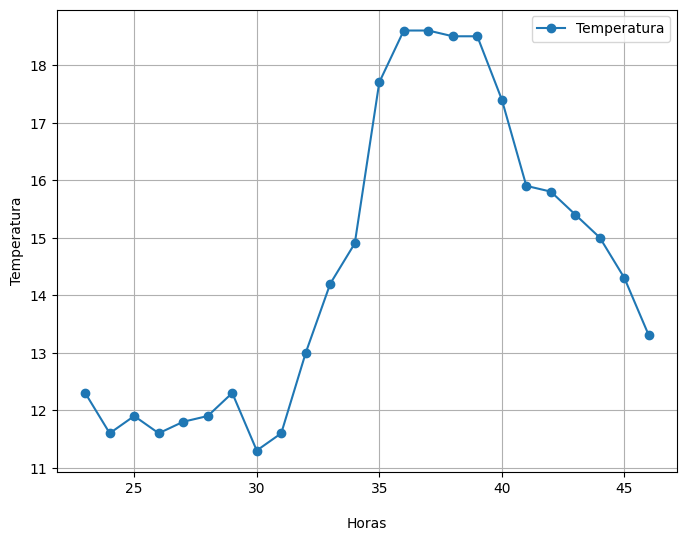

In [ ]:
pyplot.figure(figsize=(8,6))
pyplot.plot(dados['Temp. Ins. (C)'].index, dados['Temp. Ins. (C)'], 'o-', label = 'Temperatura')
pyplot.grid(True)
pyplot.plot()

pyplot.xlabel("\nHoras")
pyplot.ylabel("Temperatura")
pyplot.legend()
pyplot.show();

In [ ]:
T=dados['Temp. Ins. (C)'].values
P_hPa = dados['Pressao Ins. (hPa)'].values
Rn_KJm2 = dados['Radiacao (KJ/m²)'].values
Td = dados['Pto Orvalho Ins. (C)'].values
u2 = dados['Vel. Vento (m/s)'].values
P = P_hPa*100
Rn = Rn_KJm2*(1000/3600) #W/m²
print(T)
print(Td)

[12.3 11.6 11.9 11.6 11.8 11.9 12.3 11.3 11.6 13.  14.2 14.9 17.7 18.6
 18.6 18.5 18.5 17.4 15.9 15.8 15.4 15.  14.3 13.3]
[ 9.1  8.6  9.1  8.9  9.3 11.6  8.8  8.5  9.   7.3  8.4  8.6  9.5  9.6
  8.7 10.1  9.6  9.6 11.2 10.8 10.4 10.4 10.   9.8]


In [ ]:
rho_w = 997.0 #Kg/m³
cp = 1005.0 #J/(Kg.K)
k = 0.4
kh_kw = 1
z2 = 2 #m
zo = 0.0002 #m

def b_energia(Rn, lv): #m/s
  return (Rn)*(1/(lv*rho_w))
def calor_lat(T): #K/Kg
  return (2.501*(10**6) - 2370*T)
def cte_psi(P, lv): #Pa/°C
  return (cp*kh_kw/0.622)*(P/lv)
def e(T): #Pa
  return (611*numpy.exp((17.27*T)/(237.3+T)))
def delta_f(e, T): #Pa/°C
  return ((4098*e)/(237.3+T)**2)
def rho_ar(P,Ra,T): #Kg/m³
  return (P)/(Ra*(T+273))
def qv(e, P): #Kg/Kg
  return 0.622*(e/(P))
def b(rho_ar, u2, P): #m/Pa.s
  return (0.622*(k**2)*rho_ar*u2)/(P*rho_w*(numpy.log(z2/zo))**2)
def E_comb(delta, Er, Ea, gamma):
  return (delta/(delta + gamma))*Er + (gamma/(delta+gamma))*Ea

In [ ]:
hora = [];  lv = []; Er = []
for i in range(0,len(T)):
  lv.append(calor_lat(T[i]))
  Er.append(1000*3600*b_energia(Rn[i],lv[i])) #mm/h
  hora.append(i)


p_vap = []; dens_ar = []; umid_esp =[]; p_vap_sat =[]; B = []; Ea =[]
for i in range(0,len(T)):
  p_vap.append(e(Td[i]))
  p_vap_sat.append(e(T[i]))
  umid_esp.append(qv(p_vap[i],P[i]))
  Ra = 287*(1+0.608*umid_esp[i])
  dens_ar.append(rho_ar(P[i], Ra, T[i]))
  B.append(b(dens_ar[i], u2[i], P[i]))
  Ea.append(1000*3600*B[i]*(p_vap_sat[i] - p_vap[i])) #mm/h

delta = []; E =[]; gamma =[]
for i in range(0,len(T)):
  gamma.append(cte_psi(P[i], lv[i]))
  delta.append(delta_f(p_vap_sat[i], T[i]))
  E.append(E_comb(delta[i], Er[i], Ea[i], gamma[i]))

med_Er = sum(Er)/len(Er)
med_Ea = sum(Ea)/len(Ea)
med_E = sum(E)/len(E)
print('Valor médio pelo método do balanço de energia = {:0.6}'.format(med_Er), "mm/h")
print('\nValor médio pelo método aerodinâmico = {:0.6}'.format(med_Ea), "mm/h")
print('\nValor médio pelo método combinado= {:0.6}'.format(med_E),"mm/h")

Valor médio pelo método do balanço de energia = 0.306296 mm/h

Valor médio pelo método aerodinâmico = 0.0713357 mm/h

Valor médio pelo método combinado= 0.231593 mm/h


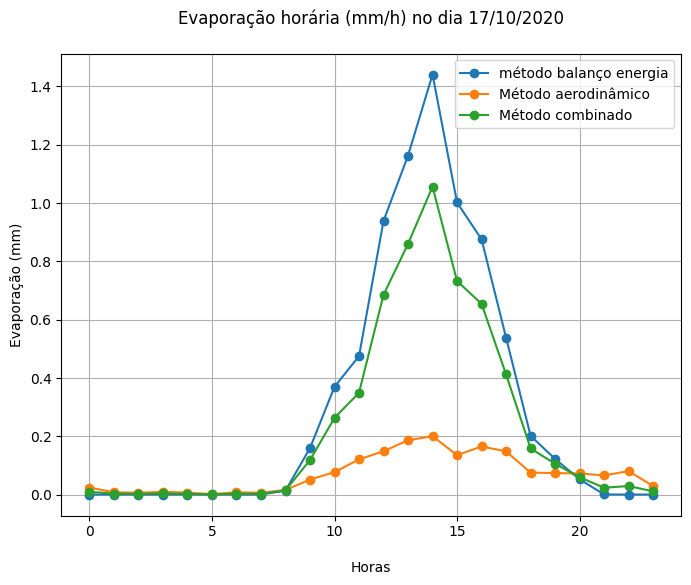

In [ ]:
pyplot.figure(figsize=(8,6))
pyplot.plot(hora, Er, 'o-', label = 'método balanço energia')
pyplot.plot(hora, Ea, 'o-', label = 'Método aerodinâmico')
pyplot.plot(hora, E, 'o-', label = 'Método combinado')
pyplot.grid(True)
pyplot.plot()

pyplot.xlabel("\nHoras")
pyplot.ylabel("Evaporação (mm)")
pyplot.title("Evaporação horária (mm/h) no dia 17/10/2020\n")
pyplot.legend()
pyplot.show()
